GRADIENT DESCENT

Example Applications:

Linear Regression

Demonstrates how to use gradient descent to fit a linear model
Includes data generation, visualization of the fitted line, and convergence tracking


Rosenbrock Function Minimization

Shows optimization on the challenging Rosenbrock function (a standard test case)
Features visualization of the optimization path on the contour plot
Includes animation capabilities to visualize the optimization process


Simple Quadratic Function

Provides a basic optimization example with a simple quadratic function
Demonstrates fast convergence for simple convex problems

GRADIENT DESCENT OPTIMIZATION EXAMPLES
Linear Regression Example
----------------------------------------
Iteration 0: cost = 10.060033, gradient norm = 7.790992
Iteration 100: cost = 0.417172, gradient norm = 0.069823
Iteration 200: cost = 0.403745, gradient norm = 0.012607
Iteration 300: cost = 0.403307, gradient norm = 0.002276
Iteration 400: cost = 0.403293, gradient norm = 0.000411
Iteration 500: cost = 0.403292, gradient norm = 0.000074
Iteration 600: cost = 0.403292, gradient norm = 0.000013
Iteration 700: cost = 0.403292, gradient norm = 0.000002
Converged at iteration 752 with gradient norm 0.000001

Results:
Optimal parameters: [4.21509177 2.77011726]
Final cost: 0.403292
Iterations: 752


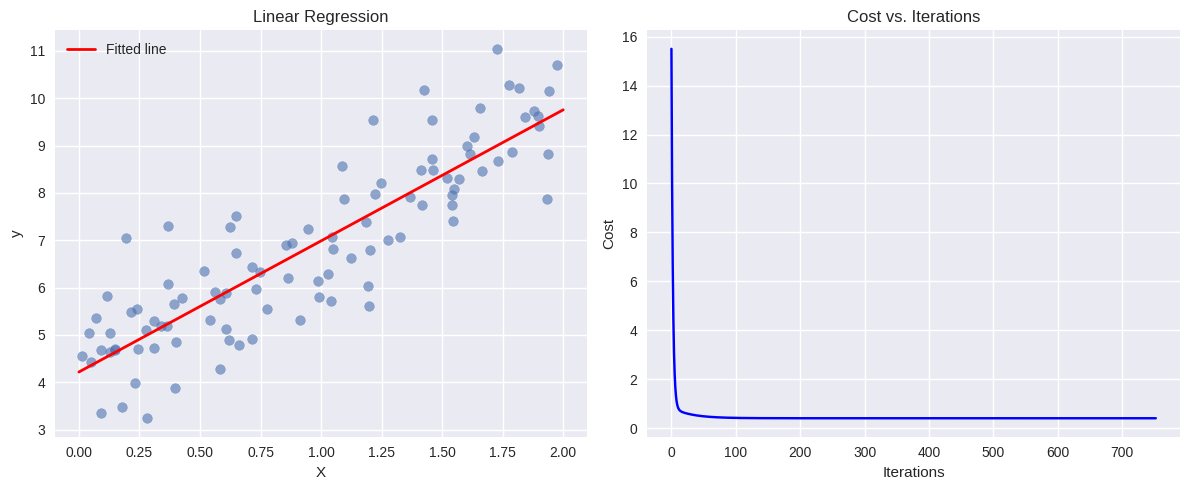


Rosenbrock Function Minimization Example
----------------------------------------
Iteration 0: cost = 3.990390, gradient norm = 4.000000
Iteration 100: cost = 3.661349, gradient norm = 1.837956
Iteration 200: cost = 3.313070, gradient norm = 1.895414
Iteration 300: cost = 2.940490, gradient norm = 1.966341
Iteration 400: cost = 2.536614, gradient norm = 2.054421
Iteration 500: cost = 2.092913, gradient norm = 2.157850
Iteration 600: cost = 1.607182, gradient norm = 2.235214
Iteration 700: cost = 1.123563, gradient norm = 2.108196
Iteration 800: cost = 0.758038, gradient norm = 1.689770
Iteration 900: cost = 0.538006, gradient norm = 1.296022
Iteration 1000: cost = 0.404817, gradient norm = 1.029293
Iteration 1100: cost = 0.317623, gradient norm = 0.849055
Iteration 1200: cost = 0.256554, gradient norm = 0.720733
Iteration 1300: cost = 0.211603, gradient norm = 0.624768
Iteration 1400: cost = 0.177284, gradient norm = 0.550124
Iteration 1500: cost = 0.150349, gradient norm = 0.490253
I

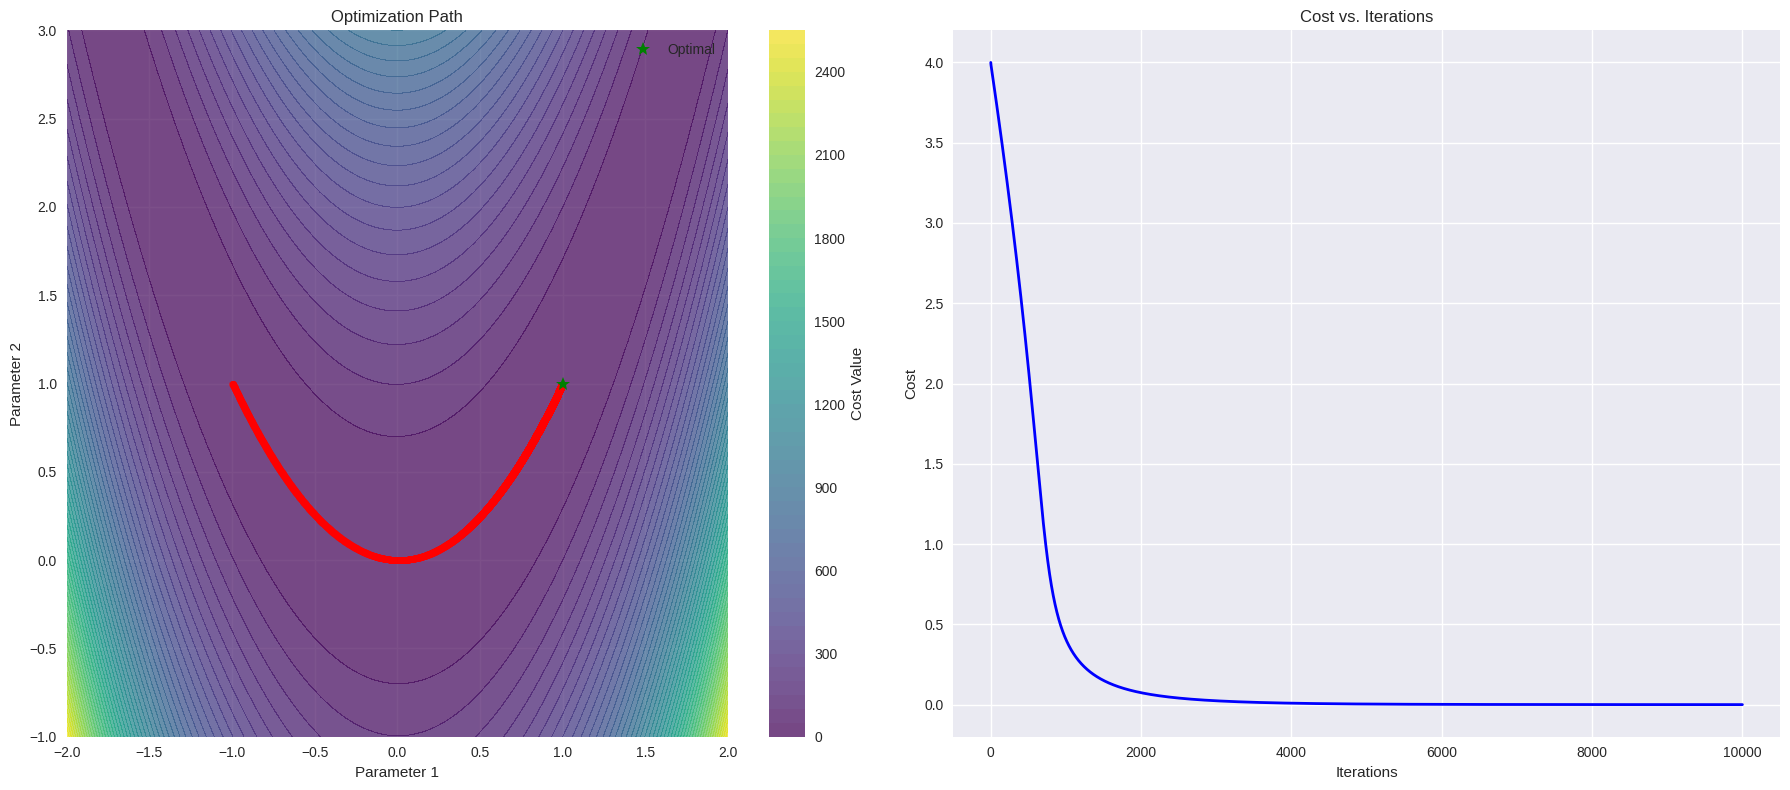


Quadratic Function Minimization Example
----------------------------------------
Iteration 0: cost = 16.000000, gradient norm = 10.000000
Converged at iteration 73 with gradient norm 0.000001

Results:
Starting point: [3. 4.]
Optimal point: [2.52749500e-07 3.36999333e-07]
Function value at optimal point: 0.0000000000
Iterations: 73


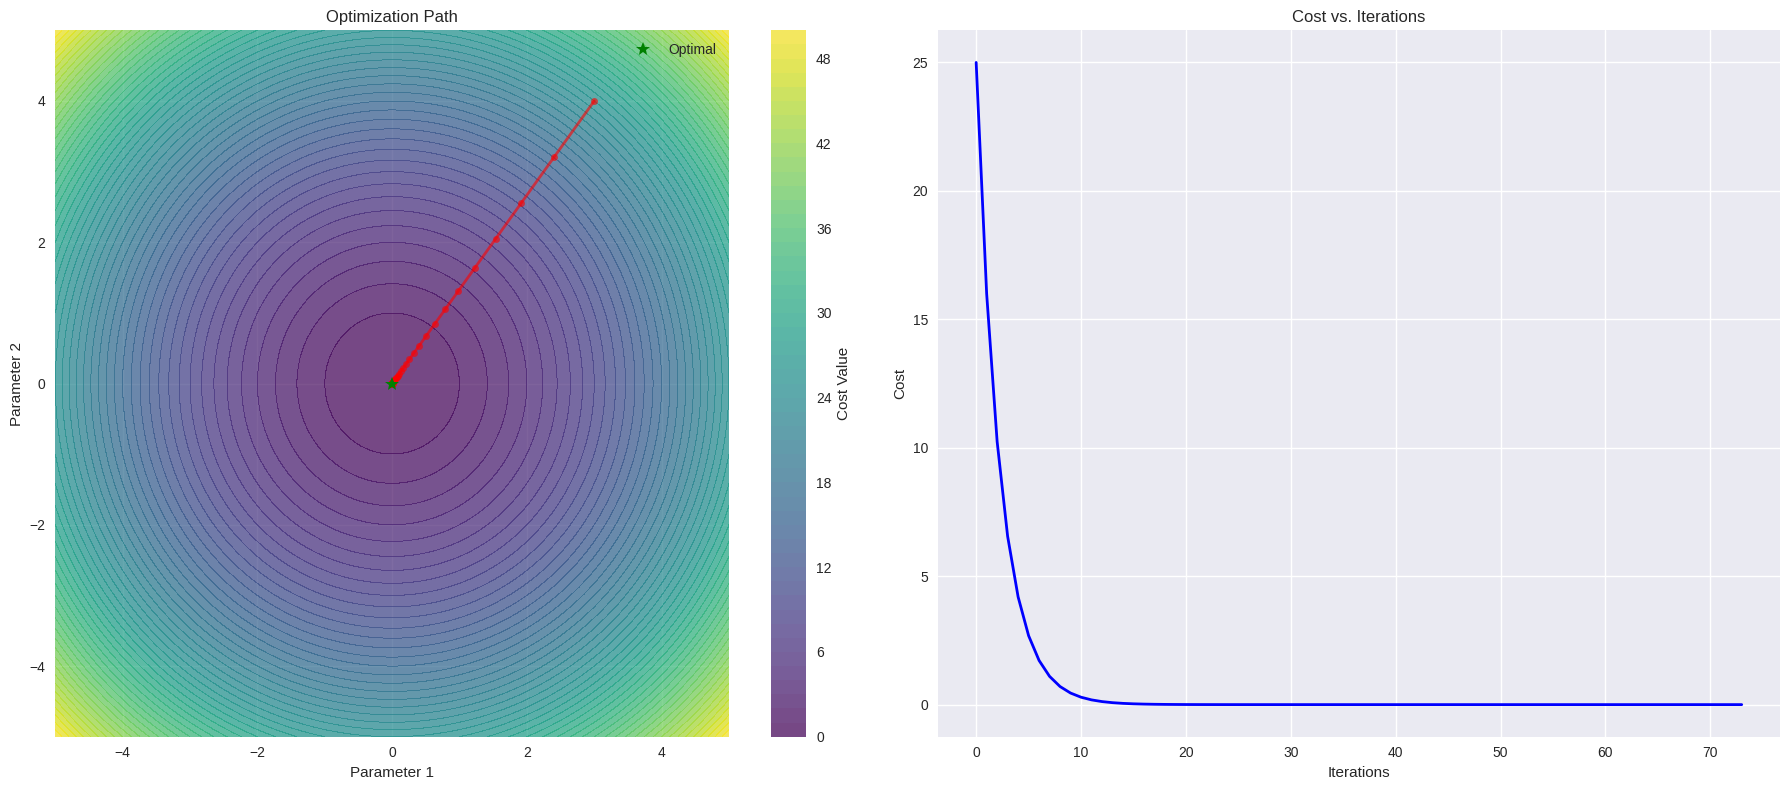

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class GradientDescent:


    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.path = []  # To store the optimization path
        self.costs = []  # To store cost function values

    def fit(self, cost_function, gradient_function, initial_params, callback=None):

        params = initial_params.copy()
        self.path = [params.copy()]
        self.costs = [cost_function(params)]

        for i in range(self.max_iterations):
            # Compute gradient
            gradient = gradient_function(params)

            # Check for convergence
            gradient_norm = np.linalg.norm(gradient)
            if gradient_norm < self.tolerance:
                print(f"Converged at iteration {i} with gradient norm {gradient_norm:.6f}")
                break

            # Update parameters
            params = params - self.learning_rate * gradient

            # Store current state
            self.path.append(params.copy())
            self.costs.append(cost_function(params))

            # Call callback if provided
            if callback:
                callback(i, params, cost_function(params), gradient)

            # Print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: cost = {self.costs[-1]:.6f}, gradient norm = {gradient_norm:.6f}")

        return params, {
            'iterations': len(self.path) - 1,
            'path': np.array(self.path),
            'costs': np.array(self.costs),
            'final_cost': self.costs[-1],
            'converged': np.linalg.norm(gradient_function(params)) < self.tolerance
        }

    def visualize_2d(self, cost_function, x_range, y_range, resolution=100, optimal_params=None):

        if len(self.path) == 0:
            raise ValueError("No optimization path to visualize. Run 'fit' first.")

        # Create grid
        x = np.linspace(x_range[0], x_range[1], resolution)
        y = np.linspace(y_range[0], y_range[1], resolution)
        X, Y = np.meshgrid(x, y)

        # Compute Z values
        Z = np.zeros_like(X)
        for i in range(resolution):
            for j in range(resolution):
                Z[i, j] = cost_function(np.array([X[i, j], Y[i, j]]))

        # Create figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

        # Plot contour and optimization path
        contour = ax1.contourf(X, Y, Z, 50, cmap='viridis', alpha=0.7)
        path = np.array(self.path)
        ax1.plot(path[:, 0], path[:, 1], 'r-o', lw=2, ms=5, alpha=0.6)
        ax1.set_xlabel('Parameter 1')
        ax1.set_ylabel('Parameter 2')
        ax1.set_title('Optimization Path')
        fig.colorbar(contour, ax=ax1, label='Cost Value')

        # Mark optimal parameters if provided
        if optimal_params is not None:
            ax1.plot(optimal_params[0], optimal_params[1], 'g*', ms=10, label='Optimal')
            ax1.legend()

        # Plot cost versus iterations
        ax2.plot(self.costs, 'b-', lw=2)
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Cost')
        ax2.set_title('Cost vs. Iterations')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def animate_2d(self, cost_function, x_range, y_range, resolution=100, interval=100):

        if len(self.path) == 0:
            raise ValueError("No optimization path to visualize. Run 'fit' first.")

        # Convert path to numpy array to ensure it's a sequence
        path = np.array(self.path)

        # Create grid
        x = np.linspace(x_range[0], x_range[1], resolution)
        y = np.linspace(y_range[0], y_range[1], resolution)
        X, Y = np.meshgrid(x, y)

        # Compute Z values
        Z = np.zeros_like(X)
        for i in range(resolution):
            for j in range(resolution):
                Z[i, j] = cost_function(np.array([X[i, j], Y[i, j]]))

        # Create figure and plot initial state
        fig, ax = plt.subplots(figsize=(10, 8))
        contour = ax.contourf(X, Y, Z, 50, cmap='viridis', alpha=0.7)
        line, = ax.plot([], [], 'r-o', lw=2, ms=5, alpha=0.6)
        point, = ax.plot([], [], 'ro', ms=8)

        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        ax.set_xlabel('Parameter 1')
        ax.set_ylabel('Parameter 2')
        ax.set_title('Gradient Descent Optimization')
        fig.colorbar(contour, ax=ax, label='Cost Value')

        # Animation update function
        def update(frame):
            if frame < len(path):
                x_data = path[:frame+1, 0].tolist()  # Convert to list to ensure it's a sequence
                y_data = path[:frame+1, 1].tolist()  # Convert to list to ensure it's a sequence
                line.set_data(x_data, y_data)
                point.set_data([path[frame, 0]], [path[frame, 1]])
            return line, point

        anim = FuncAnimation(fig, update, frames=len(path), interval=interval, blit=True)
        plt.close()  # Prevent display of the static figure

        return fig, anim


# Example 1: Linear Regression with Gradient Descent
def linear_regression_example():
    """
    Example of using Gradient Descent to solve a simple linear regression problem.
    """
    print("Linear Regression Example")
    print("-" * 40)

    # Generate synthetic data
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    # Add bias term
    X_b = np.c_[np.ones((100, 1)), X]

    # Define cost function (Mean Squared Error)
    def cost_function(theta):
        return np.mean((X_b.dot(theta) - y) ** 2) / 2

    # Define gradient function
    def gradient_function(theta):
        return X_b.T.dot(X_b.dot(theta) - y) / len(X_b)

    # Initialize parameters
    initial_theta = np.random.randn(2, 1)

    # Create GradientDescent instance
    gd = GradientDescent(learning_rate=0.1, max_iterations=1000)

    # Run optimization
    theta_opt, info = gd.fit(cost_function, gradient_function, initial_theta)

    print("\nResults:")
    print(f"Optimal parameters: {theta_opt.flatten()}")
    print(f"Final cost: {info['final_cost']:.6f}")
    print(f"Iterations: {info['iterations']}")

    # Plot results
    plt.figure(figsize=(12, 5))

    # Plot data and regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.6)
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_predict = X_new_b.dot(theta_opt)
    plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend()

    # Plot cost versus iterations
    plt.subplot(1, 2, 2)
    plt.plot(info['costs'], 'b-')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs. Iterations')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return gd, theta_opt


# Example 2: Minimizing the Rosenbrock function (a common optimization test function)
def rosenbrock_example():
    """
    Example of using Gradient Descent to minimize the Rosenbrock function.
    """
    print("\nRosenbrock Function Minimization Example")
    print("-" * 40)

    # Define Rosenbrock function and its gradient
    def rosenbrock(x):
        """Rosenbrock function: f(x,y) = (1-x)^2 + 100(y-x^2)^2"""
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

    def rosenbrock_gradient(x):
        """Gradient of the Rosenbrock function"""
        dx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
        dy = 200 * (x[1] - x[0]**2)
        return np.array([dx, dy])

    # Initial guess
    initial_point = np.array([-1.0, 1.0])

    # Create GradientDescent instance with small learning rate due to steep gradients
    gd = GradientDescent(learning_rate=0.001, max_iterations=10000, tolerance=1e-8)

    # Run optimization
    optimal_point, info = gd.fit(rosenbrock, rosenbrock_gradient, initial_point)

    print("\nResults:")
    print(f"Starting point: {initial_point}")
    print(f"Optimal point: {optimal_point}")
    print(f"Function value at optimal point: {rosenbrock(optimal_point):.10f}")
    print(f"Iterations: {info['iterations']}")

    # True minimum is at (1, 1)
    true_min = np.array([1.0, 1.0])

    # Visualize
    gd.visualize_2d(rosenbrock, x_range=(-2, 2), y_range=(-1, 3), optimal_params=true_min)

    # Create animation - but don't try to display it directly
    # Just return the figure and animation objects
    fig, anim = gd.animate_2d(rosenbrock, x_range=(-2, 2), y_range=(-1, 3))

    # Return the gradient descent object and optimal parameters only
    # Don't return the animation object which might cause issues
    return gd, optimal_point


# Example 3: Minimizing a simple quadratic function
def quadratic_example():
    """
    Example of using Gradient Descent to minimize a simple quadratic function.
    """
    print("\nQuadratic Function Minimization Example")
    print("-" * 40)

    # Define quadratic function and its gradient
    def quadratic(x):
        """Simple quadratic function: f(x,y) = x^2 + y^2"""
        return x[0]**2 + x[1]**2

    def quadratic_gradient(x):
        """Gradient of the quadratic function"""
        return 2 * x

    # Initial guess
    initial_point = np.array([3.0, 4.0])

    # Create GradientDescent instance
    gd = GradientDescent(learning_rate=0.1, max_iterations=100)

    # Run optimization
    optimal_point, info = gd.fit(quadratic, quadratic_gradient, initial_point)

    print("\nResults:")
    print(f"Starting point: {initial_point}")
    print(f"Optimal point: {optimal_point}")
    print(f"Function value at optimal point: {quadratic(optimal_point):.10f}")
    print(f"Iterations: {info['iterations']}")

    # True minimum is at (0, 0)
    true_min = np.array([0.0, 0.0])

    # Visualize
    gd.visualize_2d(quadratic, x_range=(-5, 5), y_range=(-5, 5), optimal_params=true_min)

    return gd, optimal_point


if __name__ == "__main__":
    # Run all examples
    print("GRADIENT DESCENT OPTIMIZATION EXAMPLES")
    print("=" * 50)

    # Example 1: Linear Regression
    linear_gd, linear_params = linear_regression_example()

    # Example 2: Rosenbrock Function - fixed to not return animation
    rosenbrock_gd, rosenbrock_params = rosenbrock_example()

    # Example 3: Quadratic Function
    quadratic_gd, quadratic_params = quadratic_example()

